In [ ]:
## Requirements
#!pip3 install torch numpy matplotlib

from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive"



Mounted at /content/drive


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 904ms/step - accuracy: 0.4634 - loss: 0.6941
Epoch 1: val_loss improved from inf to 0.67863, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4632 - loss: 0.6948 - val_accuracy: 0.6389 - val_loss: 0.6786
Epoch 2/30
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6528 - loss: 0.6731
Epoch 2: val_loss improved from 0.67863 to 0.66636, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 315ms/step - accuracy: 0.6528 - loss: 0.6711 - val_accuracy: 0.6944 - val_loss: 0.6664
Epoch 3/30
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6632 - loss: 0.6537 
Epoch 3: val_loss improved from 0.66636 to 0.65372, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step - accuracy: 0.6591 - loss: 0.6527 - val_accuracy: 0.6944 - val_loss: 0.6537
Epoch 4/30
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7378 - loss: 0.6401
Epoch 4: val_loss improved from 0.65372 to 0.64227, saving model to bes

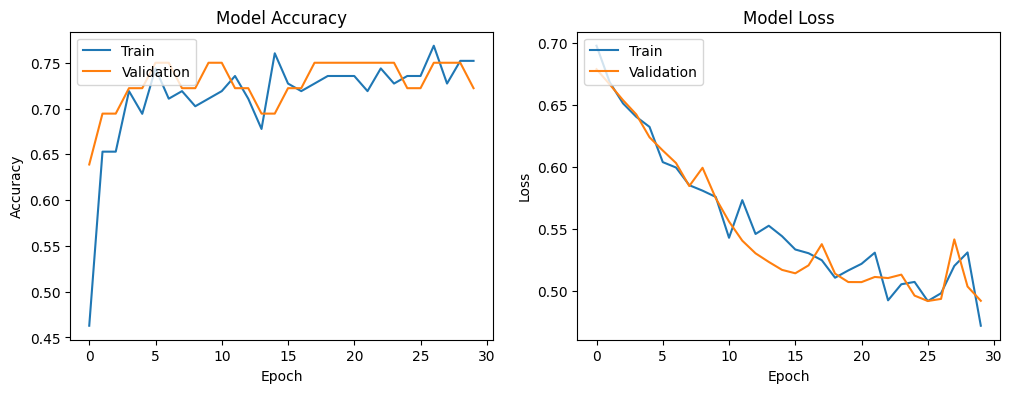

[0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1
 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0]


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


# Define the directories
base_dir = '/content/drive/MyDrive/Colab Notebooks/brain_t'
yes_dir = os.path.join(base_dir, '/content/drive/MyDrive/Colab Notebooks/brain_t/yes')
no_dir = os.path.join(base_dir, '/content/drive/MyDrive/Colab Notebooks/brain_t/no')



# Initialize lists to hold the images and labels
images = []
labels = []

# Load the 'yes' images
for filename in os.listdir(yes_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_y = load_img(os.path.join(yes_dir, filename), target_size=(150, 150))
        img_array_y = img_to_array(img_y)
        images.append(img_array_y)
        labels.append(1)  # 1 for 'yes'


# Load the 'no' images
for filename in os.listdir(no_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_n = load_img(os.path.join(no_dir, filename), target_size=(150, 150))
        img_array_n = img_to_array(img_n)
        images.append(img_array_n)
        labels.append(0)  # 0 for 'no'

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


# Shuffle the dataset
images, labels = shuffle(images, labels, random_state=42)

# Split into training (80%), validation (10%), and test (10%) sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.3, random_state=42)


train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Build the CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

# Train the model
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=30,
    callbacks=callbacks
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

# Save the model
model.save('brain_tumor_classifier.keras')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
print(labels)


In [ ]:
# Make predictions on the test set
predictions = model.predict(test_images)
# Convert probabilities to binary output
predicted_labels = (predictions)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


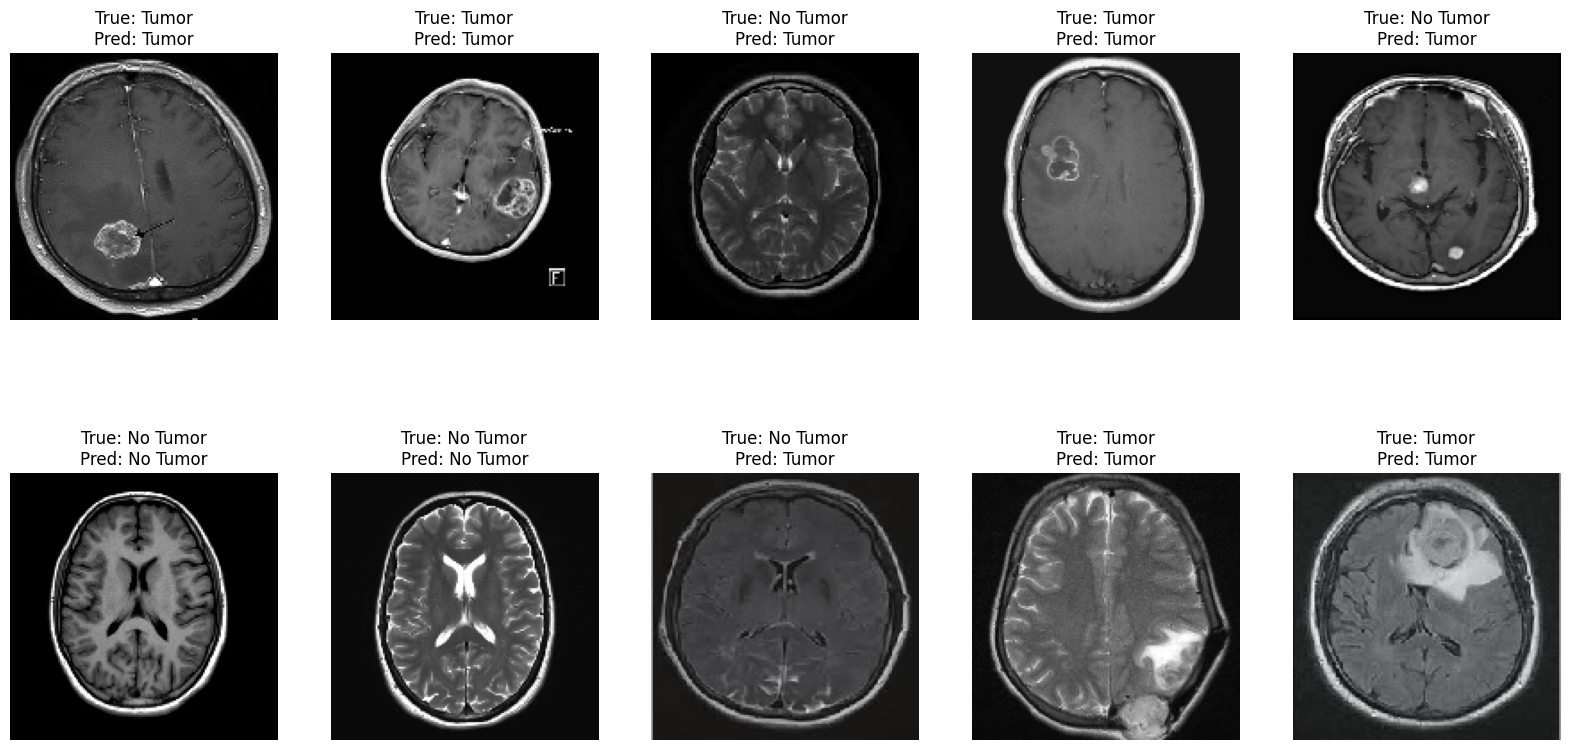

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot images with predicted labels
def plot_images_with_predictions(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        true_label = 'Tumor' if true_labels[i] == 1 else 'No Tumor'
        predicted_label = 'Tumor' if predicted_labels[i] > 0.1 else 'No Tumor'
        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')
    plt.show()

# Display the first 10 test images with their true and predicted labels
plot_images_with_predictions(test_images, test_labels, predicted_labels, num_images=10)
